In [20]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import os
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

## Annotations visualization templet.
anns = coco.loadAnns(annIds)    
coco.showAnns(anns)

In [21]:
dataDir=os.path.expanduser('~/datasets/coco')
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
stuffFile = '{}/annotations/stuff_{}.json'.format(dataDir, dataType)

In [22]:
# initialize COCO api for instance annotations
coco=COCO(annFile)
coco_stuff = COCO(stuffFile)

loading annotations into memory...
Done (t=2.74s)
creating index...
index created!
loading annotations into memory...
Done (t=2.19s)
creating index...
index created!


In [23]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
# get category ids that satisfy given filter conditions
# load category with given ids
nms=[cat['name'] for cat in cats]
print(f'Number of categories: {len(nms)}')
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

Number of categories: 80
COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
indoor kitchen sports vehicle electronic furniture food accessory person outdoor animal appliance


In [24]:
## display COCO_stuff categories and supercategories.abs
stuff_cats = coco_stuff.loadCats(coco_stuff.getCatIds())
stuff_nms = [stuff_cat['name'] for stuff_cat in stuff_cats]
print(f'Number of stuff categories: {len(stuff_nms)}')
print('COCO stuff categories: \n{}\n'.format(' '.join(stuff_nms)))

stuff_super_cats = set(cat['supercategory'] for cat in stuff_cats)
print('COCO stuff supercategories: \n{}'.format(' '.join(stuff_super_cats)))

Number of stuff categories: 92
COCO stuff categories: 
banner blanket branch bridge building-other bush cabinet cage cardboard carpet ceiling-other ceiling-tile cloth clothes clouds counter cupboard curtain desk-stuff dirt door-stuff fence floor-marble floor-other floor-stone floor-tile floor-wood flower fog food-other fruit furniture-other grass gravel ground-other hill house leaves light mat metal mirror-stuff moss mountain mud napkin net paper pavement pillow plant-other plastic platform playingfield railing railroad river road rock roof rug salad sand sea shelf sky-other skyscraper snow solid-other stairs stone straw structural-other table tent textile-other towel tree vegetable wall-brick wall-concrete wall-other wall-panel wall-stone wall-tile wall-wood water-other waterdrops window-blind window-other wood other

COCO stuff supercategories: 
wall other raw-material ceiling food-stuff water plant window structural building furniture-stuff textile ground floor solid sky


In [25]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard'])
imgIds = coco.getImgIds(catIds=catIds)
imgIds = coco.getImgIds(imgIds = [324158])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
# return a dict with img info

In [26]:
imgIds = coco.getImgIds(catIds=catIds);
img2 = coco.loadImgs(imgIds[0])
img2

[{'license': 2,
  'file_name': '000000549220.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000549220.jpg',
  'height': 640,
  'width': 480,
  'date_captured': '2013-11-18 11:01:23',
  'flickr_url': 'http://farm4.staticflickr.com/3145/2419498650_fdfe34eb93_z.jpg',
  'id': 549220}]

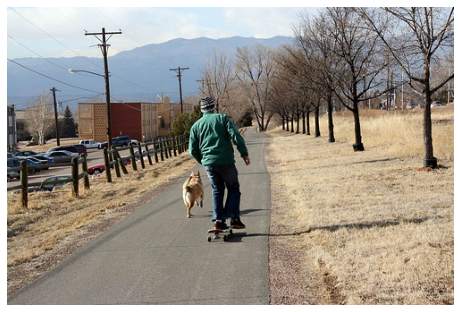

In [27]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()
# Question: Load from web??

[10673, 638724, 2162813]
{'segmentation': [[216.7, 211.89, 216.16, 217.81, 215.89, 220.77, 215.89, 223.73, 217.77, 225.35, 219.12, 224.54, 219.12, 220.5, 219.66, 217.27, 219.93, 212.7, 220.46, 207.85, 219.66, 203.01, 218.85, 198.43, 217.77, 195.74, 216.7, 194.93, 215.62, 190.62, 215.62, 186.59, 214.27, 183.89, 211.85, 184.16, 211.85, 187.66, 210.24, 187.66, 209.16, 184.97, 207.81, 183.36, 205.12, 186.59, 205.12, 189.28, 201.08, 192.78, 199.74, 195.2, 196.78, 200.04, 196.51, 203.01, 198.12, 205.43, 197.32, 209.2, 196.78, 213.23, 197.05, 218.89, 199.74, 221.85, 201.62, 225.35, 201.62, 233.69, 201.08, 236.11, 202.97, 236.38, 204.85, 236.11, 204.58, 232.34, 203.78, 228.85, 205.39, 233.15, 207.81, 235.57, 208.62, 234.23, 206.74, 231.27, 205.12, 228.04, 206.74, 222.39, 208.35, 219.96, 210.77, 217.54, 211.85, 221.85, 214.54, 223.73, 212.93, 217.54, 212.93, 215.66, 215.89, 212.96, 216.16, 212.16]], 'area': 759.3375500000002, 'iscrowd': 0, 'image_id': 324158, 'bbox': [196.51, 183.36, 23.95, 53.

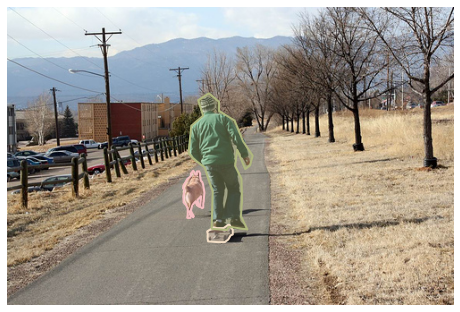

In [28]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
print(annIds)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)
print(anns[0])
# print(type(anns))
# # anns are segementation mask
# # get -load - show

[]


0

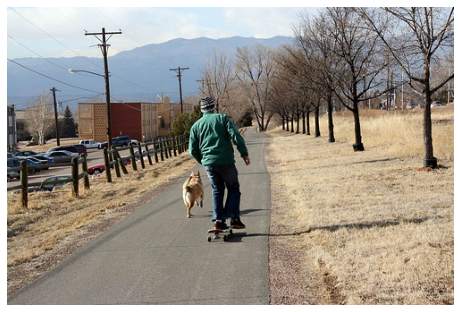

In [31]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco_stuff.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=0)
print(annIds)
stuff_anns = coco_stuff.loadAnns(annIds)
coco_stuff.showAnns(stuff_anns)

[196.51, 183.36, 53.02, 23.95, 53.02]
[223.48, 243.72, 19.61, 28.67, 19.61]
[202.71, 96.55, 153.14, 71.78, 153.14]


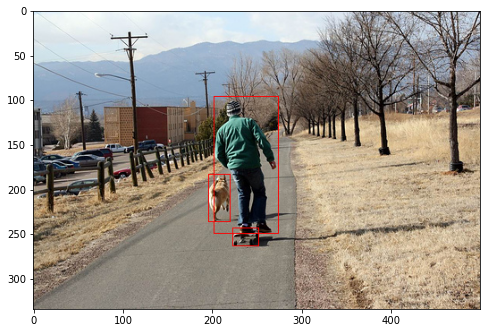

In [44]:
## bbox
import cv2

I2 = I.copy()
for i in anns:
    [x,y,w,h] = i['bbox']
    print([x,y,h,w,h])
    cv2.rectangle(I2, (int(x), int(y)), (int(x+w), int(y+h)), (255,0,0), thickness=1)
# cv2.imshow(' ', I)
plt.imshow(I2) ## warning, !!I2 is changed
plt.show()

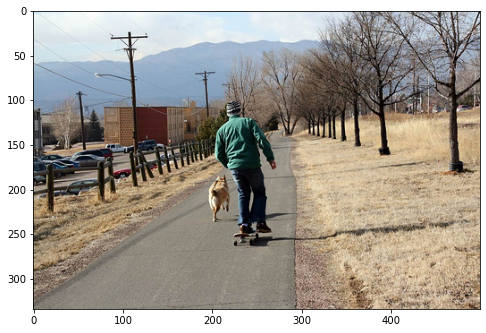

In [45]:
plt.imshow(I)

(334, 500)


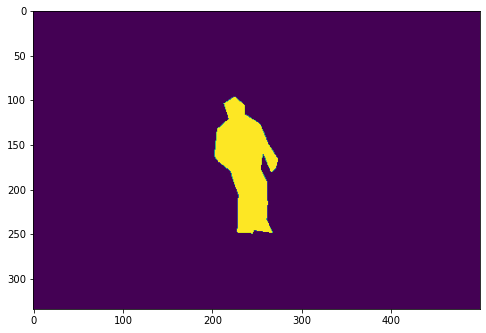

In [25]:
# convert anns to binary mask: m*n in {0,1}
bimask = coco.annToMask(anns[2])
print(bimask.shape)
plt.imshow(bimask)
plt.show()

In [9]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=0.44s)
creating index...
index created!


[{'segmentation': [[228.43, 247.9, 229.63, 206.62, 224.24, 191.07, 220.65, 179.7, 207.49, 169.53, 202.71, 163.55, 205.7, 133.04, 218.86, 121.68, 213.47, 104.33, 225.44, 96.55, 236.8, 106.12, 236.8, 116.29, 254.15, 127.06, 263.72, 150.39, 274.49, 166.54, 271.5, 177.31, 266.12, 181.5, 257.14, 159.96, 254.75, 177.91, 261.93, 192.27, 262.53, 216.79, 261.33, 234.14, 268.51, 249.1, 247.57, 246.11, 245.78, 249.69, 229.03, 248.5]], 'num_keypoints': 12, 'area': 5999.5445, 'iscrowd': 0, 'keypoints': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 212, 135, 2, 241, 125, 2, 209, 162, 2, 257, 146, 2, 218, 172, 2, 267, 167, 2, 225, 177, 2, 247, 176, 2, 235, 203, 2, 254, 204, 2, 236, 240, 2, 254, 238, 2], 'image_id': 324158, 'bbox': [202.71, 96.55, 71.78, 153.14], 'category_id': 1, 'id': 2162813}]


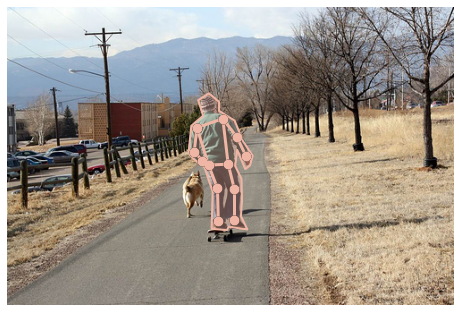

In [10]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
print(anns)
coco_kps.showAnns(anns)
# 给出比较粗糙的segmention和关键点

In [11]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.09s)
creating index...
index created!


[{'image_id': 324158, 'id': 310079, 'caption': 'A man is skate boarding down a path and a dog is running by his side.'}, {'image_id': 324158, 'id': 311105, 'caption': 'A man on a skateboard with a dog outside. '}, {'image_id': 324158, 'id': 311588, 'caption': 'A person riding a skate board with a dog following beside.'}, {'image_id': 324158, 'id': 312677, 'caption': 'This man is riding a skateboard behind a dog.'}, {'image_id': 324158, 'id': 312860, 'caption': 'A man walking his dog on a quiet country road.'}]
A man is skate boarding down a path and a dog is running by his side.
A man on a skateboard with a dog outside. 
A person riding a skate board with a dog following beside.
This man is riding a skateboard behind a dog.
A man walking his dog on a quiet country road.


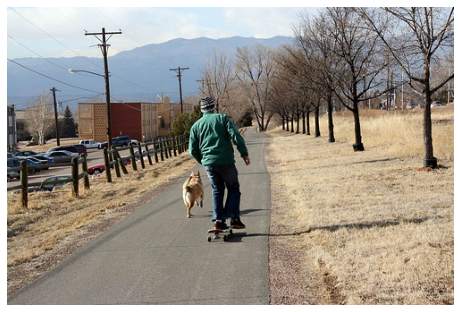

In [27]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
print(anns)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()

In [14]:
import pycocotools.mask as mask_utils

In [26]:

def seg_to_mask(seg, width=1.0, height=1.0):
    """
    Tiny utility for decoding segmentation masks using the pycocotools API.
    """
    if type(seg) == list:
        rles = mask_utils.frPyObjects(seg, height, width)
        rle = mask_utils.merge(rles)
    elif type(seg['counts']) == list:
        rle = mask_utils.frPyObjects(seg, height, width)
    else:
        rle = seg
    return mask_utils.decode(rle)

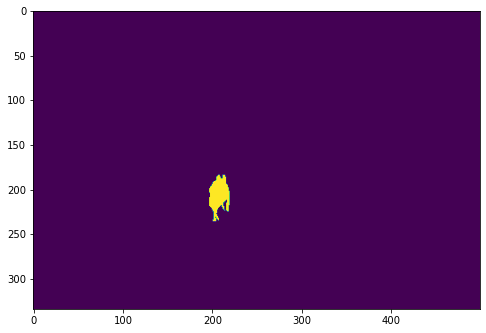

In [36]:
HH,WW,C = I.shape
obj_dog = anns[0]
mask = seg_to_mask(obj_dog['segmentation'], WW, HH)
plt.imshow(mask)
plt.show()

0
1
2


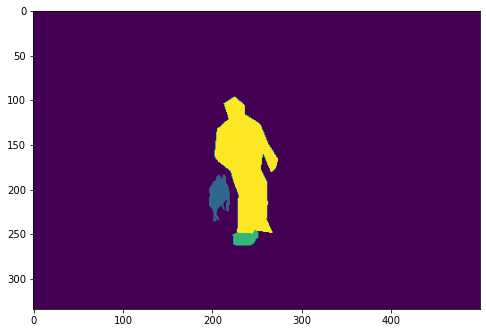

In [47]:
## Generate semantic segmentation and visualize it


def getClassName(classID, cats):
    for i in range(len(cats)):
        if cats[i]['id']==classID:
            return cats[i]['name']
    return "None"

mask = np.zeros((HH, WW))
for i in range(len(anns)):
    # className = getClassName(anns[i]['category_id'], cats)
    pixel_value = i+1 # avoid background 0.
    print(i)
    mask = np.maximum(coco.annToMask(anns[i])*pixel_value, mask) # get maximum along the channl. 会导致pixel_value大的值覆盖小的。
plt.imshow(mask)

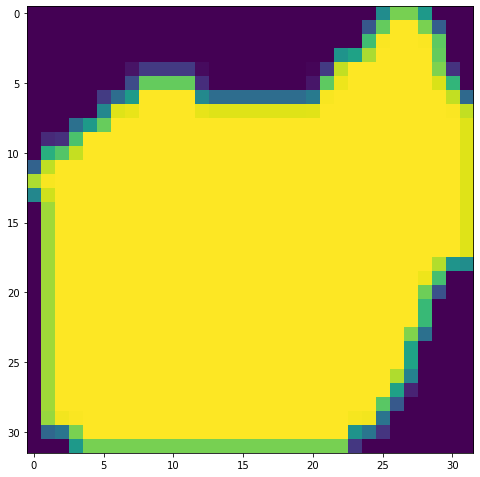

In [51]:
from skimage.transform import resize as imresize

mask_size = 32
bimask = coco.annToMask(anns[0])
x,y,w,h = anns[0]['bbox']

mx0, mx1 = int(round(x)), int(round(x + w))
my0, my1 = int(round(y)), int(round(y + h))
mx1 = max(mx0 + 1, mx1)
my1 = max(my0 + 1, my1)
obj_mask = bimask[my0:my1, mx0:mx1]
obj_mask = imresize(255.0 * obj_mask, (mask_size, mask_size),
                    mode='constant')
plt.imshow(obj_mask)
plt.show()